<a href="https://colab.research.google.com/github/DorcasO/DorcasO/blob/main/AIUniBot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AI-Powered University Course Advisor Chatbot

In [ ]:
pip install requests beautifulsoup4

In [ ]:
import requests
from bs4 import BeautifulSoup
import os

Step1: Mount Google Drive
To save our scraped data persistently, we mount Google Drive to access its file system from Colab.

In [ ]:
import os

#Define path inside your Google Drive
drive_path = "/content/drive/MyDrive/AMDARI/Cambridge_scraped_data"

# Create the folder if it doesn't exist
os.makedirs(drive_path, exist_ok=True)

Step 2: Create Output Folder
We define the path to a folder named cambridge_scraped_data inside your Google Drive. If the folder doesn't exist, we create it using os.makedirs().

Step 4: Define Target Pages
We store URLs of useful university pages in a dictionary. Each key represents the filename to save as, and each value is the page URL.

In [ ]:
pages = {
    "undergraduate_courses": "https://www.undergraduate.study.cam.ac.uk/courses",
    "fees_and_funding": "https://www.cambridgestudents.cam.ac.uk/fees-and-funding/fees",
    "colleges_and_departments": "https://www.cam.ac.uk/colleges-and-departments/college-a-z",
    "admin":"https://www.afpa.admin.cam.ac.uk/",
    "fees_and_finance":"https://www.undergraduate.study.cam.ac.uk/fees-and-finance",
    "living_costs":"https://www.undergraduate.study.cam.ac.uk/fees-and-finance/living-costs",
    "international_fees_and_costs":"https://www.undergraduate.study.cam.ac.uk/international-students/international-fees-and-costs"
}

Step 5: Web Scraping Function
This function:

Sends a GET request to the given URL
Parses HTML using BeautifulSoup
Extracts the page title and all paragraphs (<p>)
Returns them as a list of strings

In [ ]:
def scrape_page(url):
    try:
        response = requests.get(url, timeout=10)
        response.raise_for_status()
        soup = BeautifulSoup(response.text, 'html.parser')

        title = soup.title.text.strip() if soup.title else "No Title"
        paragraphs = [p.text.strip() for p in soup.find_all("p") if p.text.strip()]
        return title, paragraphs
    except Exception as e:
        print(f"Error scraping {url}: {e}")
        return "Error", []


Step 6: Save Data as Markdown File
This function:

Combines the scraped title and content into markdown format
Saves the file inside your Google Drive folder as filename.md

In [ ]:
def save_to_markdown(title, paragraphs, filename):
    filepath = os.path.join(drive_path, f"{filename}.md")
    with open(filepath, "w", encoding="utf-8") as f:
        f.write(f"# {title}\n\n")
        for para in paragraphs:
            f.write(f"{para}\n\n")
    print(f"✅ Saved to: {filepath}")


Step 7: Loop Through Pages and Save Results
For each page in our list:

Scrape the content using scrape_page()
Save it as a .md file using save_to_markdown()

In [ ]:
for filename, url in pages.items():
    print(f"Scraping: {url}")
    title, content = scrape_page(url)
    save_to_markdown(title, content, filename)


/content/drive/MyDrive/AMDARI/Cambridge_scraped_data

# Install core libraries

In [9]:
pip install -q transformers sentence-transformers faiss-cpu langchain gradio chromadb qdrant-client

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 4.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.3/31.3 MB 27.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 54.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 329.0/329.0 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.2/284.2 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 41.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 58.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.5/118.5 kB 7.3 MB/s eta 0

# Mount Drive for access to your knowledge base and saved models/indexes
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
pip install -U langchain-community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.9/438.9 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.7 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.65
    Uninstalling langchain-core-0.3.65:
      Successfully uninstalled langchain-core-0.3.65


In [ ]:
import os
from langchain.document_loaders import TextLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
KB_PATH = "/content/drive/MyDrive/AMDARI/Cambridge_scraped_data"

files = [os.path.join(KB_PATH, f) for dp, _, fn in os.walk(KB_PATH) for f in fn if f.endswith(".md")]
docs = [doc for f in files for doc in TextLoader(f, encoding="utf-8").load()]

text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=50)
chunks = text_splitter.split_documents(docs)
texts = [chunk.page_content for chunk in chunks]
print(f" {len(chunks)} chunks generated.")



Batches:   0%|          | 0/2 [00:00<?, ?it/s]

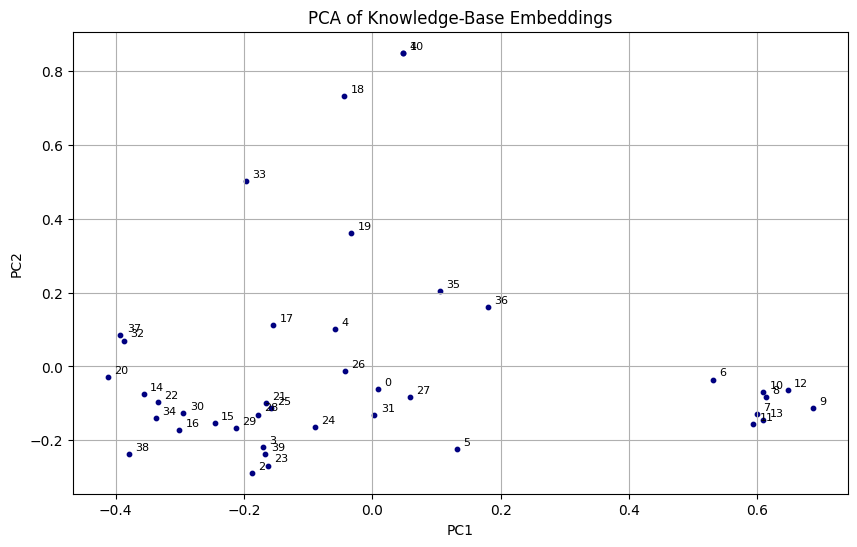

In [42]:
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# 1. Embed all chunks
embed_model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")
texts = [chunk.page_content for chunk in  chunks]
embeddings = embed_model.encode(texts, show_progress_bar=True)

# 2. PCA to 2 dimensions
pca = PCA(n_components=2)
reduced = pca.fit_transform(embeddings)

#3. Plot
plt.figure(figsize=(10, 6))
for i, (x,y) in enumerate(reduced):
  plt.scatter(x, y, s=10, c="navy")
  plt.text(x + 0.01, y + 0.01, str(i), fontsize=8)
plt.title("PCA of Knowledge-Base Embeddings")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

In [ ]:
import faiss
from langchain.vectorstores import FAISS as LangChainFAISS
from langchain.docstore import InMemoryDocstore
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.schema import Document

# 1. Raw FAISS index
dim = embeddings.shape[1]
faiss_index = faiss.IndexFlatL2(dim)
faiss_index.add(np.array(embeddings, dtype="float32"))

# 2. Prepare LangChain wrapper
docs = [Document(page_content=t) for t in texts]
docstore = InMemoryDocstore({str(i): docs[i] for i in range(len(docs))})
id_map = {i: str(i) for i in range(len(docs))}
embed_fn = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")

vectorstore_faiss = LangChainFAISS(
    index=faiss_index,
    docstore=docstore,
    index_to_docstore_id=id_map,
    embedding_function=embed_fn
)

print("  FAISS vectorstore ready.")

In [ ]:
query = "what is Cambridge University about?"
results = vectorstore_faiss.similarity_search(query, k=3)

print("Top-3 FAISS Results:")
for i, doc in enumerate(results):
  print(f"\n- Passage {i+1}:\n{doc.page_content[:300]}...")


In [ ]:
import chromadb
from chromadb.config import Settings
from chromadb.utils.embedding_functions import SentenceTransformerEmbeddingFunction

# 1. Initialize persistent client (will create 'chroma_data/' locally)
client = chromadb.PersistentClient(
    path="chroma_data",
    settings=Settings()
)

# 2. Create or load a collection named "Cambridge University"
collection = client.get_or_create_collection(
    name="CambridgeUniversity",
    embedding_function=SentenceTransformerEmbeddingFunction(
        model_name="sentence-transformers/all-MiniLM-L6-V2"
    )
)

# 3. Upsert your chunks (ids + documents)
ids = [str(i) for i in range(len(texts))]
collection.upsert(
    documents=texts,
    ids=ids
)
# 4. Query for top-3 similar passages

query = "What is Cambridge University about?"
resp = collection.query(
    query_texts=[query],
    n_results=3
)
print("Top-3 ChromaDB Results:")
for doc in resp["documents"][0]:
    print("-", doc[:200].replace("\n"," "), "...")

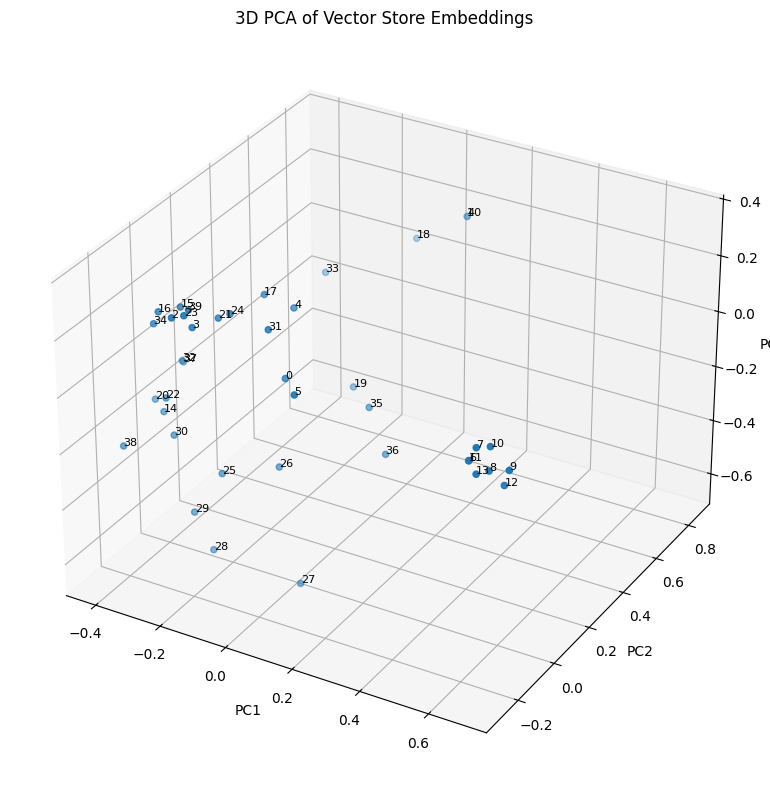

In [41]:
# 3D PCA Visualization of Your Vector Store Embeddings

from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 1. Extract FAISS index
faiss_idx = vectorstore_faiss.index
n = faiss_idx.ntotal

# 2. Reconstruct all vectors
emb_arr = np.vstack([faiss_idx.reconstruct(i) for i in range(n)])

# 3. Reduce to 3D
pca3 = PCA(n_components=3)
embeddings_3d = pca3.fit_transform(emb_arr)

# 4. Plot in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
xs, ys, zs = embeddings_3d[:, 0], embeddings_3d[:, 1], embeddings_3d[:, 2]
ax.scatter(xs, ys, zs)

# Annotate each point with its index
for i in range(n):
    ax.text(xs[i], ys[i], zs[i], str(i), fontsize=8)

ax.set_title("3D PCA of Vector Store Embeddings")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.tight_layout()
plt.show()


In [ ]:
# Install dependencies
!pip install -q transformers sentence-transformers faiss-cpu langchain gradio
!pip install -q -U langchain-community

Block 1: Install Dependencies & Mount Google Drive
Before anything else, we need to set up our environment:

Install Libraries
transformers: for loading and running the Falcon-E-1B language model
sentence-transformers: for generating vector embeddings from text
faiss-cpu: for building an in-memory vector index for similarity search
langchain: to orchestrate retrieval-augmented-generation (RAG) pipelines
gradio: to create a simple web interface for our QA system


Block 3: Generate Embeddings & Build the FAISS Vectorstore
With text chunks in hand, we:

Embed every chunk into a high-dimensional vector using the all-MiniLM-L6-v2 sentence transformer.
Create a FAISS flat L2 index (IndexFlatL2) and add all chunk embeddings—this lets us do lightning-fast nearest-neighbor searches.
Wrap the FAISS index in LangChain’s FAISS class, linking each vector back to its original text chunk for easy retrieval.
At the end of this cell, we have a fully functional vector database ready to answer semantic similarity queries.



In [ ]:
from langchain.chains import RetrievalQA
from langchain.prompts import PromptTemplate
from langchain.vectorstores import Chroma
from langchain.embeddings import SentenceTransformerEmbeddings
from langchain.schema import Document
from langchain.llms import HuggingFacePipeline
from transformers import pipeline

In [26]:
# Load Chroma DB
embedding_model = SentenceTransformerEmbeddings(model_name="all-MiniLM-L6-v2")
vectorstore = Chroma(persist_directory="course_chroma_db")

### change this to your chroma database
embedding_function= embedding_model

# Custom Prompt
custom_prompt_template = """ You are a helpful assistant for a UK university course advisor bot.
You must answer questions using ONLY the contex provided below. If the answer is not in the context, respond with: "I don't know based on the information available".

Context: {context}
Question: {question}
Answer: """
prompt = PromptTemplate(
    input_variables=["context", "question"],
    template = custom_prompt_template,
)

/tmp/ipython-input-26-3286001284.py:3: LangChainDeprecationWarning: The class `Chroma` was deprecated in LangChain 0.2.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-chroma package and should be used instead. To use it run `pip install -U :class:`~langchain-chroma` and import as `from :class:`~langchain_chroma import Chroma``.
  vectorstore = Chroma(persist_directory="course_chroma_db")


In [27]:
# Load Small LLM
llm_pipeline = pipeline(
    "text2text-generation",
    model="google/flan-t5-large",### you can start with "google/flan-t5-base"
    max_length=512,
    temperature=0.0
)
llm = HuggingFacePipeline(pipeline=llm_pipeline)

config.json:   0%|          | 0.00/662 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.13G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

Device set to use cpu
The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
/tmp/ipython-input-27-3760134407.py:8: LangChainDeprecationWarning: The class `HuggingFacePipeline` was deprecated in LangChain 0.0.37 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFacePipeline``.
  llm = HuggingFacePipeline(pipeline=llm_pipeline)


In [28]:
# Function to Filter by Course + Shared
def get_filtered_retriever(selected_course):
  return vectorstore.as_retriever(
      search_kwargs={
          "k":5,
          "filter":{
              "course":{"$in":
[selected_course.lover(),"General Info"]}
          }
      }
  )

In [40]:
# Create RetrievalQA chain for a specific course
def get_qa_chain_for_course(course_name):
  retriever = vectorstore.as_retriever(course_name)
  return RetrievalQA.from_chain_type(
      llm=llm,
      chain_type="stuff",
      retriever=retriever,
      chain_type_kwargs={"prompt":prompt}
  )

In [52]:
import torch, re
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline # Corrected spelling
from langchain.llms import HuggingFacePipeline

In [74]:
#1. Load LLM model
MODEL_id = "mistralai/Mistral-7B-Instruct-v0.1"
tokenizer = AutoTokenizer.from_pretrained(MODEL_id)
model = AutoModelForCasualLM.from_pretrained(
    MODEL_id,device_map="auto", load_in_8bit=True)


#2. Buildgeneration pipeline
text_gen_pipeline = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    torch_dtypye=torch.bfloat16,
    device_map="auto",
    return_full_text=False,
    do_sample=True,
    max_new_tokens=256,
    pad_token_id=tokenizer.eos_token_id
)
llm = HuggingFacePipeline(pipeline=text_gen_pipeline)

#3. Promp + answer function
def format_prompt(context,question):
    return (
        "Answer using ONLY the context below. "
        "If not found, say: 'I don't know based on the available information.'\n\n"
        f"Context:\n{context}\n\nQuestion: {question}\nAnswer"
    )




OSError: You are trying to access a gated repo.
Make sure to have access to it at https://huggingface.co/mistralai/Mistral-7B-Instruct-v0.1.
401 Client Error. (Request ID: Root=1-6857499c-78c47aeb21c29dc11f74eca2;6f8af503-0bde-4e86-bc2a-e38348b36725)

Cannot access gated repo for url https://huggingface.co/mistralai/Mistral-7B-Instruct-v0.1/resolve/main/config.json.
Access to model mistralai/Mistral-7B-Instruct-v0.1 is restricted. You must have access to it and be authenticated to access it. Please log in.